In [3]:
# Loading Packages
import warnings
warnings.filterwarnings('ignore',category=DeprecationWarning)

# import libraries
import numpy as np
import pandas as pd
import nltk
import matplotlib.pyplot as plt
import re,random,os
import seaborn as sns
from nltk.corpus import stopwords
import string
from pprint import pprint as pprint
import random
from random import choices

# spacy for basic processing, optional, can use nltk as well(lemmatisation etc.)
import spacy

#gensim for LDA
import gensim
import gensim.corpora as corpora
from gensim.utils import simple_preprocess
from gensim.models import CoherenceModel

#plotting tools
import pyLDAvis
import pyLDAvis.gensim #dont skip this
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
# Loading in the movie and book reviews for The Hunger Games

reviews_movie = pd.read_csv("/Users/easonwarren/Downloads/MSA/Text Analytics/IMDBHungerGamesReviews (1).csv")

# Randomly selecting the same number as the book revies
random.seed(1234)
random_500 = random.sample(range(len(reviews_movie)), 595)

# Grabs the random sample of rows from the Hunger Games Movie Review
reviews_movie = reviews_movie.iloc[random_500]

reviews_book = pd.read_csv("/Users/easonwarren/Downloads/MSA/Text Analytics/Goodreads-HungerGames.csv")

# Randomly sampling with replacement for both sets of reviews
bootstrap_random_movie = choices(range(595), k = 595)
movie_bootstrap = reviews_movie.iloc[bootstrap_random_movie]

bootstrap_random_book = choices(range(595), k = 595)
book_bootstrap = reviews_book.iloc[bootstrap_random_book]

# tokenize using gensims simple_preprocess
def sent_to_words(sentences, deacc=True):  # deacc=True removes punctuations
    for sentence in sentences:
        yield(simple_preprocess(str(sentence)))
        
data_book = book_bootstrap['Title'].values.tolist()
data_words_book = list(sent_to_words(data_book))

data_movie = movie_bootstrap['Review'].values.tolist()
data_words_movie = list(sent_to_words(data_movie))

from itertools import chain

book_reviews_list = list(chain(*data_words_book))

movie_reviews_list = list(chain(*data_words_movie))

from sentiment_module import sentiment

book_sentiment = sentiment.sentiment(book_reviews_list)

movie_sentiment = sentiment.sentiment(movie_reviews_list)

valence_diff = book_sentiment['valence'] - movie_sentiment['valence']

arousal_diff = book_sentiment['arousal'] - movie_sentiment['arousal']

df1 = pd.DataFrame(columns = ['Valence Difference', 'Arousal Difference'])

df2 = pd.DataFrame({'Valence Difference': [valence_diff], 'Arousal Difference': arousal_diff})

df1 = pd.concat([df1, df2])

df1

/var/folders/2m/rrfmdhf53vdb6pytyx9q_z280000gn/T/ipykernel_79416/3525326992.py:52: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, df2])


Valence Difference  Arousal Difference
0            0.043045           -0.017598

In [27]:
df1 = pd.DataFrame(columns = ['Number', 'Valence Difference', 'Arousal Difference'])

for i in range(1000):
    bootstrap_random_movie = choices(range(595), k = 595)
    movie_bootstrap = reviews_movie.iloc[bootstrap_random_movie]

    bootstrap_random_book = choices(range(595), k = 595)
    book_bootstrap = reviews_book.iloc[bootstrap_random_book]
    
    data_book = book_bootstrap['Title'].values.tolist()
    data_words_book = list(sent_to_words(data_book))

    data_movie = movie_bootstrap['Review'].values.tolist()
    data_words_movie = list(sent_to_words(data_movie))
    
    book_reviews_list = list(chain(*data_words_book))

    movie_reviews_list = list(chain(*data_words_movie))
    
    book_sentiment = sentiment.sentiment(book_reviews_list)

    movie_sentiment = sentiment.sentiment(movie_reviews_list)
    
    valence_diff = book_sentiment['valence'] - movie_sentiment['valence']

    arousal_diff = book_sentiment['arousal'] - movie_sentiment['arousal']
    
    df2 = pd.DataFrame({'Number': [i], 'Valence Difference': [valence_diff], 'Arousal Difference': arousal_diff})

    df1 = pd.concat([df1, df2])

/var/folders/2m/rrfmdhf53vdb6pytyx9q_z280000gn/T/ipykernel_79416/2134962256.py:30: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df1 = pd.concat([df1, df2])


In [28]:
df1

Number  Valence Difference  Arousal Difference
0       0            0.017228           -0.021460
0       1            0.031812           -0.026597
0       2            0.050672           -0.030978
0       3            0.037493           -0.035049
0       4            0.026574           -0.015966
..    ...                 ...                 ...
0     995            0.013497           -0.008986
0     996            0.008117            0.014334
0     997            0.029880           -0.021989
0     998            0.041813           -0.016931
0     999            0.034472           -0.007405

[1000 rows x 3 columns]

<Axes: >

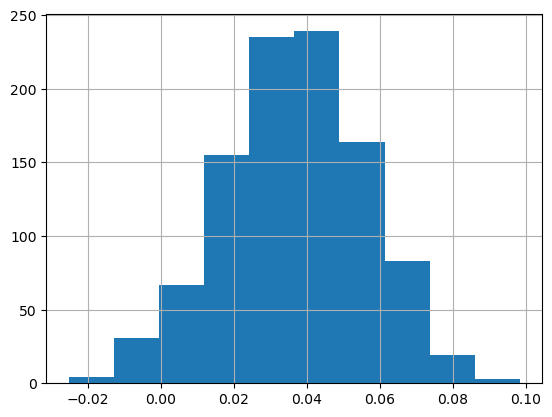

In [29]:
df1['Valence Difference'].hist()

<Axes: >

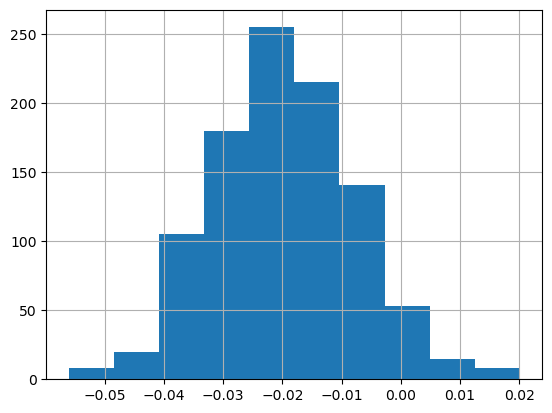

In [30]:
df1['Arousal Difference'].hist()

In [102]:
print(np.quantile(df1['Arousal Difference'], 0.001))
print(np.quantile(df1['Arousal Difference'], 0.999))

-0.051625014799043294
0.013881427885444149


In [32]:
df1.to_csv("/Users/easonwarren/Downloads/MSA/Text Analytics/sentiment_difference.csv", encoding = 'utf-7')